In [15]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
from numpy import *
import pandas as pd
import scipy.integrate
from scipy import interpolate

'''
Author: Alejandro Angel
Contact: alejandro.angelc@upb.edu.co
Date: February 8th, 2019
'''

In [16]:
# parameters of flight. 
v_inf = 40.82 # m/s
rho_inf = 1.174224 # kg/m3
alppha = 0 # deg (°) Change as needed
chord = 180 # mm

# import the data
data = pd.read_csv('0deg.csv',sep=',') # change filename depending on the dataset to be used
x_u = data['x_u']
x_l = data['x_l']
x_l = x_l[pd.notnull(x_l)] # clean NaN values
x_uc = divide(x_u,chord) # normalize chord
x_lc = divide(x_l,chord) # normalize chord

# pressure differences of upper and lower surface (p-p_inf)
dp_u = data['dp_u']
dp_l = data['dp_l']
dp_l = dp_l[pd.notnull(dp_l)] # clean NaN values

# free-stream dynamic pressure
q_inf = 1/2*rho_inf*v_inf**2  # Pa
print('Dynamic Pressure: %f Pa' %(q_inf))

# pressure coefficient computation for uppen and lower surface
Cp_u = divide(dp_u,q_inf)
Cp_l = divide(dp_l,q_inf)

#print(Cp_u,Cp_l)

Dynamic Pressure: 978.288521 Pa


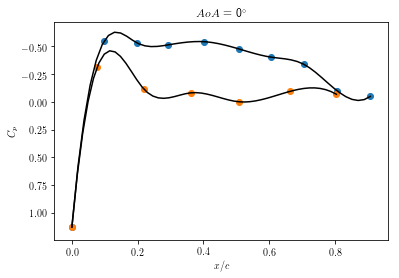

In [18]:
# Lift coefficient calculation

deg = 3 # degree of interpolating polynomial
k = 50
x_cont_u = linspace(x_uc[0],x_uc.iloc[-1],k)
x_cont_l = linspace(x_lc[0],x_lc.iloc[-1],k)

# INTERPORLATION ~~~~~~~~~~~~~~~~~~~~~~~~~~~
f_u = interpolate.interp1d(x_uc,Cp_u,deg,fill_value='extrapolate',bounds_error=False)
f_l = interpolate.interp1d(x_lc,Cp_l,deg,fill_value='extrapolate',bounds_error=False)

y_u = f_u(x_cont_u)
y_l = f_l(x_cont_l)
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

plt.rc('text', usetex=True)
plt.scatter(x_uc, Cp_u)
plt.scatter(x_lc, Cp_l)
plt.plot(x_cont_u,y_u,'k-')
plt.plot(x_cont_l,y_l,'k-')
plt.xlabel('$x/c$')
plt.ylabel('$C_{p}$')
plt.title('$AoA$ = %i$^\circ$'%(alppha))
plt.gca().invert_yaxis() # invert Y-axis by aerodynamic convention

In [13]:
# integrate over interpolated curve
upp_int = scipy.integrate.trapz(x_cont_u,y_u)
low_int = scipy.integrate.trapz(x_cont_l,y_l)
Cl = upp_int-low_int
print('Lift Coefficient:')
print(Cl)
L = q_inf*Cl*chord/1000
print('Lift:\n%f N' %(L))

Lift Coefficient:
0.26575367132244987
Lift:
46.797078 N
